In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2
%matplotlib inline

In [2]:
healthy_leaf=cv2.imread('Banana/train/healthy/20210219_121643.jpg')
healthy_leaf=cv2.cvtColor(healthy_leaf,cv2.COLOR_BGR2RGB)

In [3]:
healthy_leaf.shape

(113, 150, 3)

In [4]:
type(healthy_leaf)

numpy.ndarray

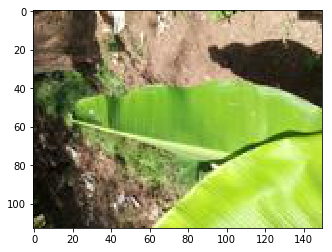

In [5]:
plt.imshow(healthy_leaf)

In [6]:
segatoka_leaf=cv2.imread('Banana/train/segatoka/20210219_114440.jpg')
segatoka_leaf=cv2.cvtColor(segatoka_leaf,cv2.COLOR_BGR2RGB)

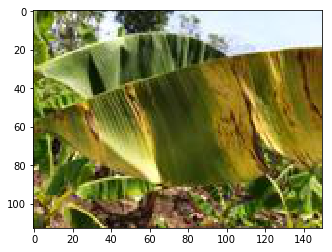

In [7]:
plt.imshow(segatoka_leaf)

In [8]:
xamthomonas_leaf=cv2.imread('Banana/train/xamthomonas/20210219_150622(0).jpg')
xamthomonas_leaf=cv2.cvtColor(xamthomonas_leaf,cv2.COLOR_BGR2RGB)

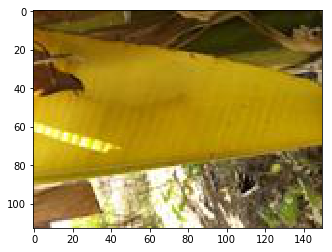

In [9]:
plt.imshow(xamthomonas_leaf)

In [10]:
from keras_preprocessing.image import ImageDataGenerator #for image manupilation

In [11]:
image_gen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [12]:
image_gen.flow_from_directory('Banana/train')

Found 966 images belonging to 3 classes.


In [13]:
image_gen.flow_from_directory('Banana/test')

Found 323 images belonging to 3 classes.


In [14]:
#resizing the image
image_shape=(150,150)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [24]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

#last layer is binary
model.add(Dense(1))
model.add(Activation('sigmoid'))
#compiling the model
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy']
            )

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        36928     
__________

In [26]:
#training the model
batch_size=16
train_image_gen=image_gen.flow_from_directory('Banana/train',
                                              target_size=image_shape[:12],
                                              batch_size=batch_size,
                                              class_mode='binary'
                                             
                                             )
test_datagen = ImageDataGenerator(rescale=1./255)


Found 966 images belonging to 3 classes.


In [27]:
test_image_gen=image_gen.flow_from_directory('Banana/test',
                                              target_size=image_shape[:12],
                                              batch_size=batch_size,
                                              class_mode='binary'
                                             
                                             )

Found 323 images belonging to 3 classes.


In [28]:
result=model.fit_generator(train_image_gen,
                           epochs=3,
                            steps_per_epoch=150,
                            validation_data=test_image_gen,
                            validation_steps=12
                           )

Epoch 1/3
150/150 [==============================] - 255s 2s/step - loss: -8.0945 - acc: 0.2485 - val_loss: -8.4694 - val_acc: 0.2396
Epoch 2/3
150/150 [==============================] - 257s 2s/step - loss: -8.1396 - acc: 0.2483 - val_loss: -8.4694 - val_acc: 0.2396
Epoch 3/3
150/150 [==============================] - 260s 2s/step - loss: -8.0488 - acc: 0.2499 - val_loss: -8.4694 - val_acc: 0.2396


In [29]:
result.history['acc']

[0.24810126584793446, 0.2483193277686584, 0.2491596638780682]

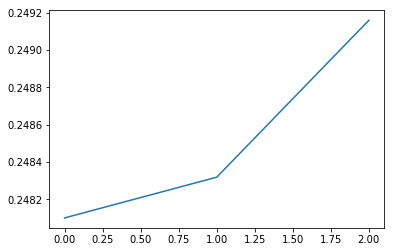

In [30]:
plt.plot(result.history['acc'])

In [23]:
train_image_gen.class_indices

{'healthy': 0, 'segatoka': 1, 'xamthomonas': 2}